In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neighbors import KNeighborsRegressor



In [4]:

bc = pd.read_csv("/content/dataR2.csv")

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [7]:
bc.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


# Visualization Data

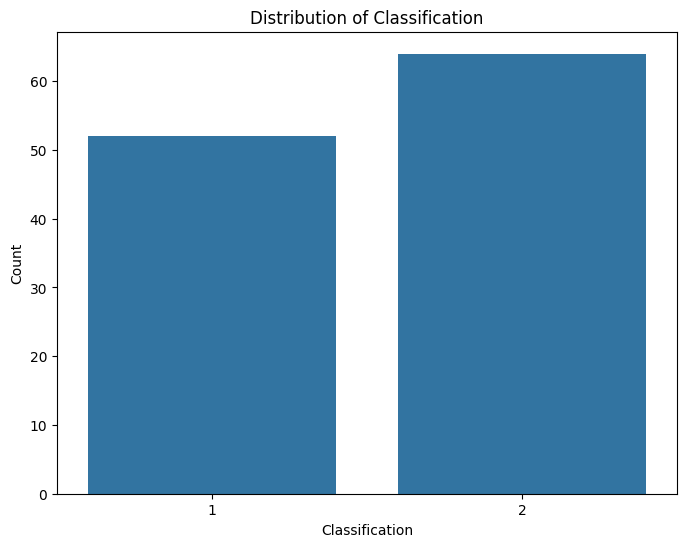

In [8]:
# Bar chart of target variable distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Classification', data=bc)
plt.title('Distribution of Classification')
plt.xlabel('Classification')
plt.ylabel('Count')
plt.show()

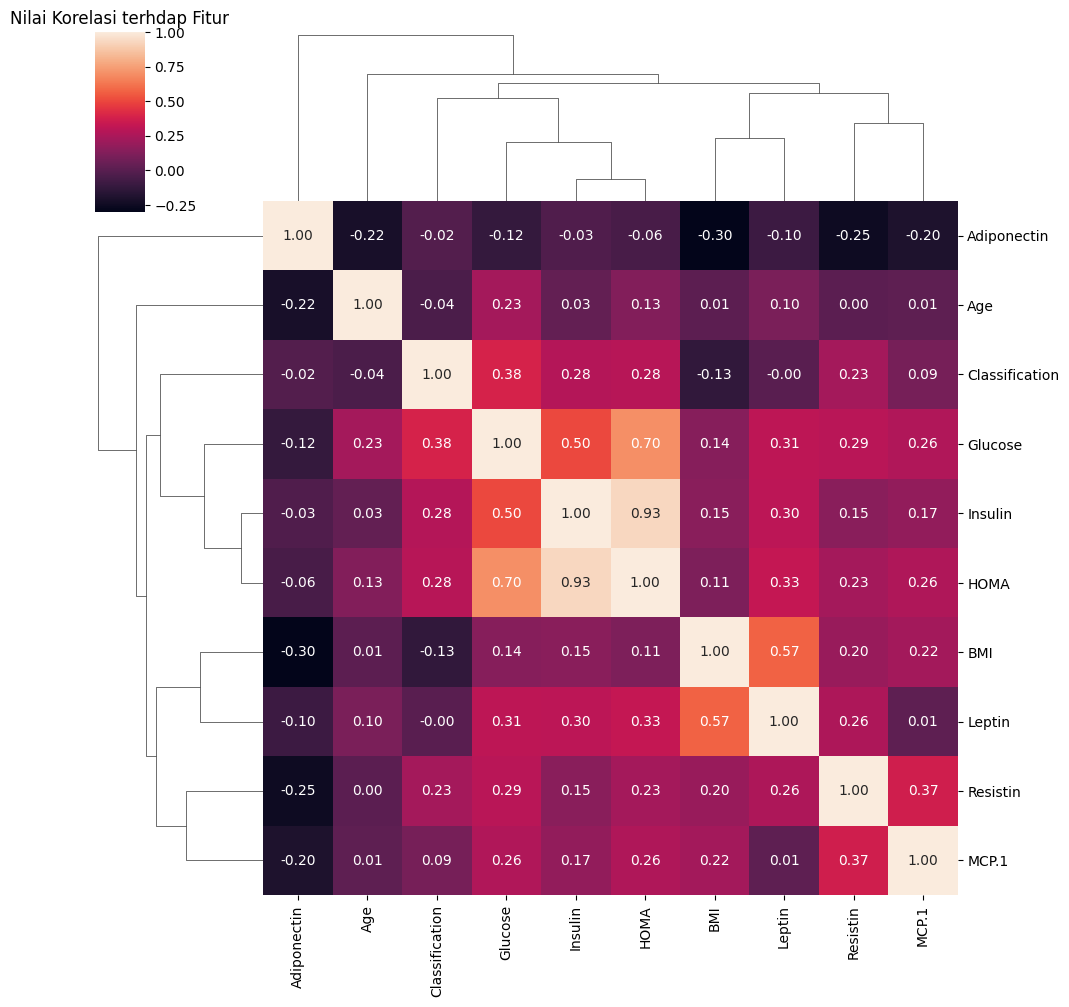

In [9]:
corr_matrix = bc.corr()

sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Nilai Korelasi terhdap Fitur")
plt.show()

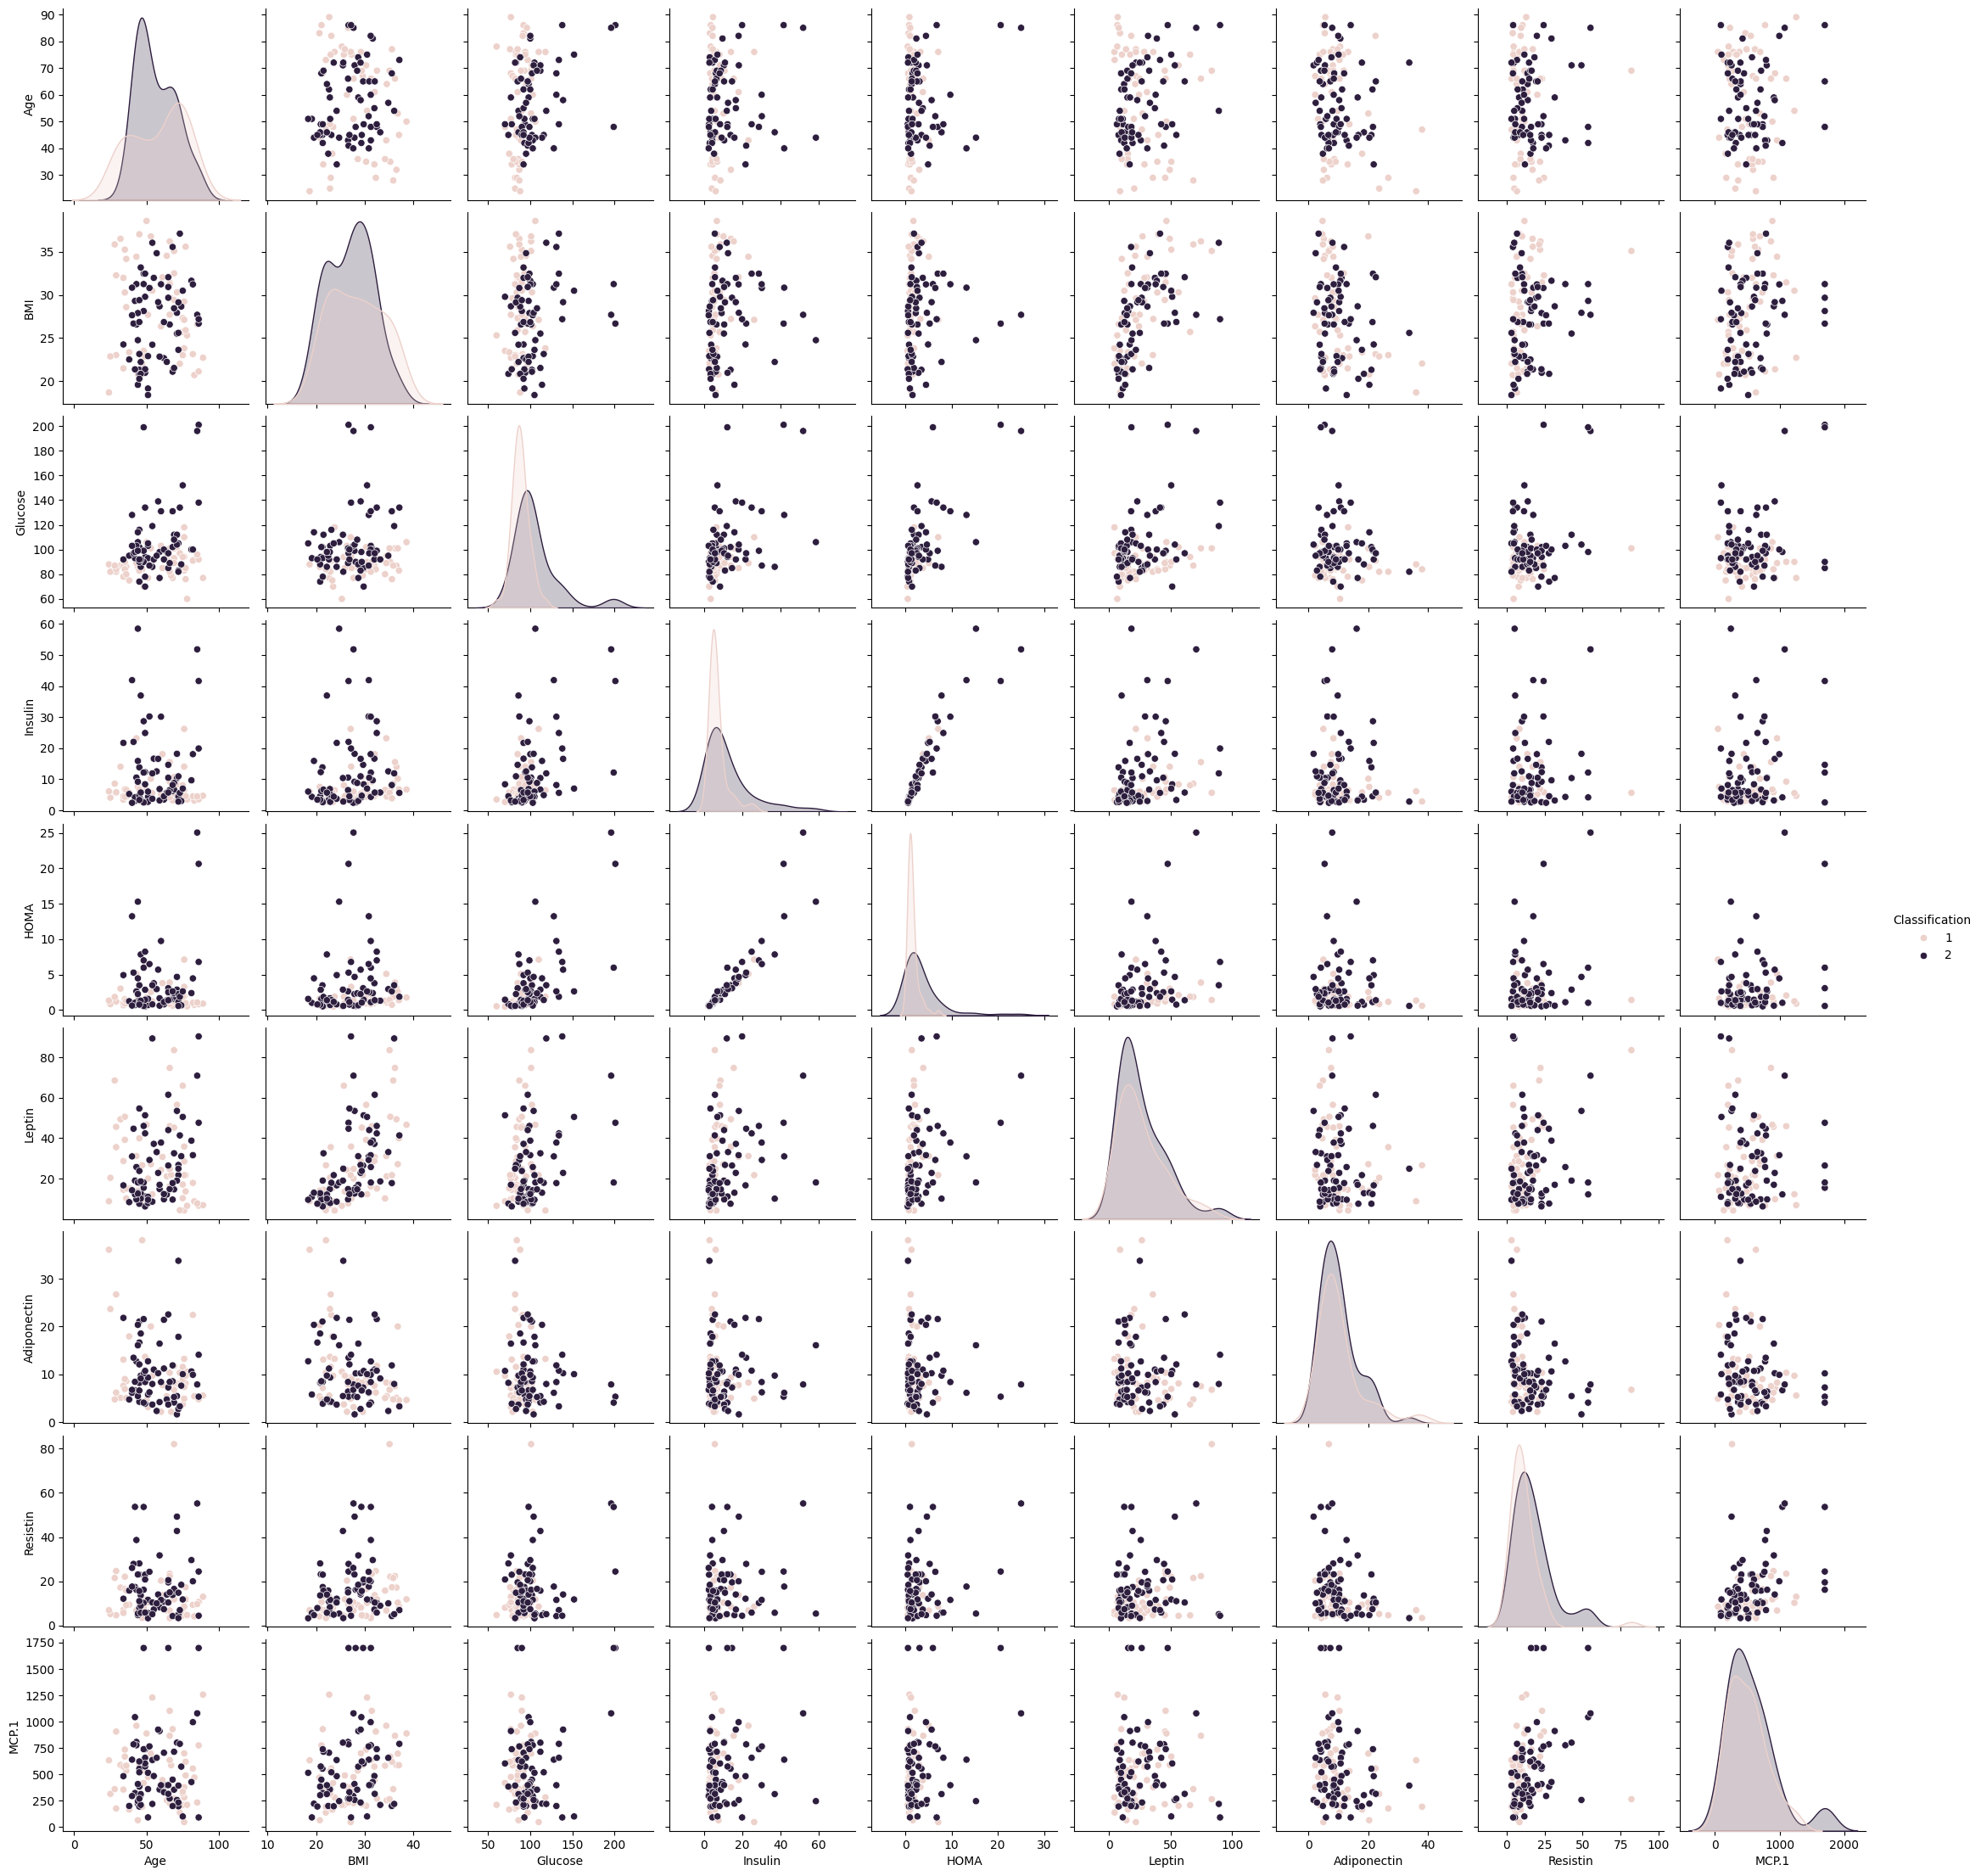

In [10]:
sns.pairplot(bc, hue = "Classification");

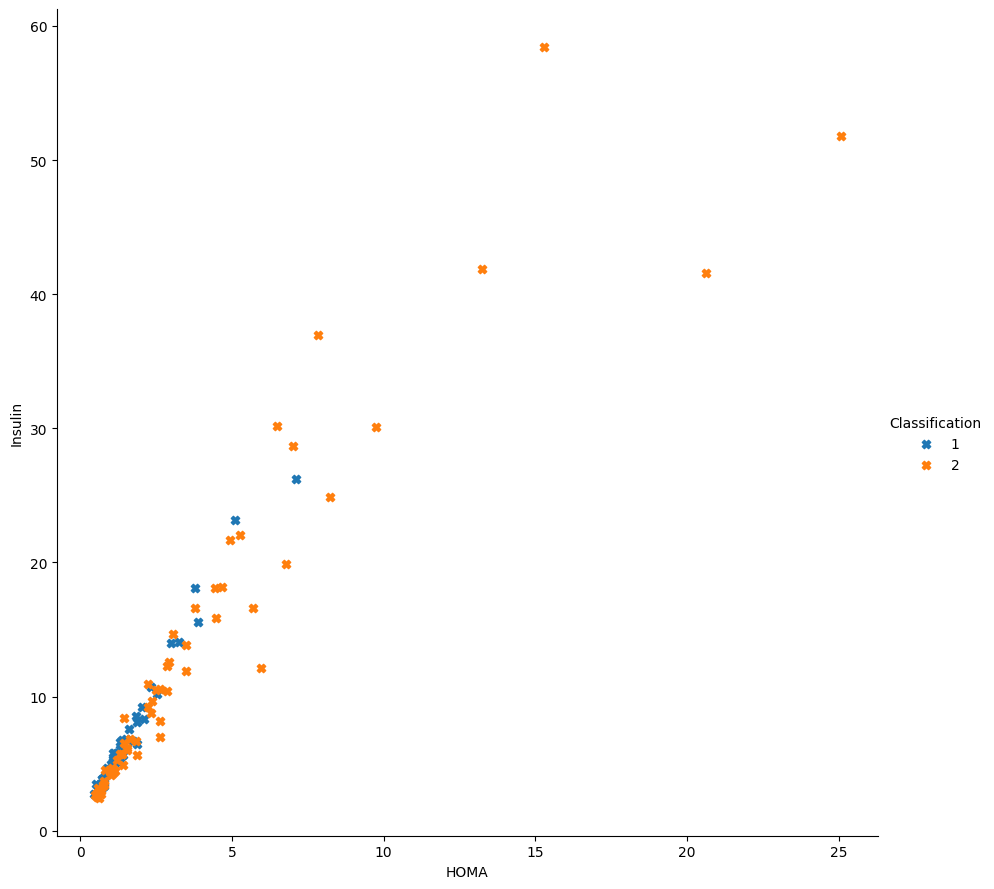

In [11]:
g = sns.FacetGrid(bc, hue='Classification',height=9)  # Defining Axis
g = g.map(plt.scatter, "HOMA", "Insulin", marker='X').add_legend() # Plotting
plt.show()

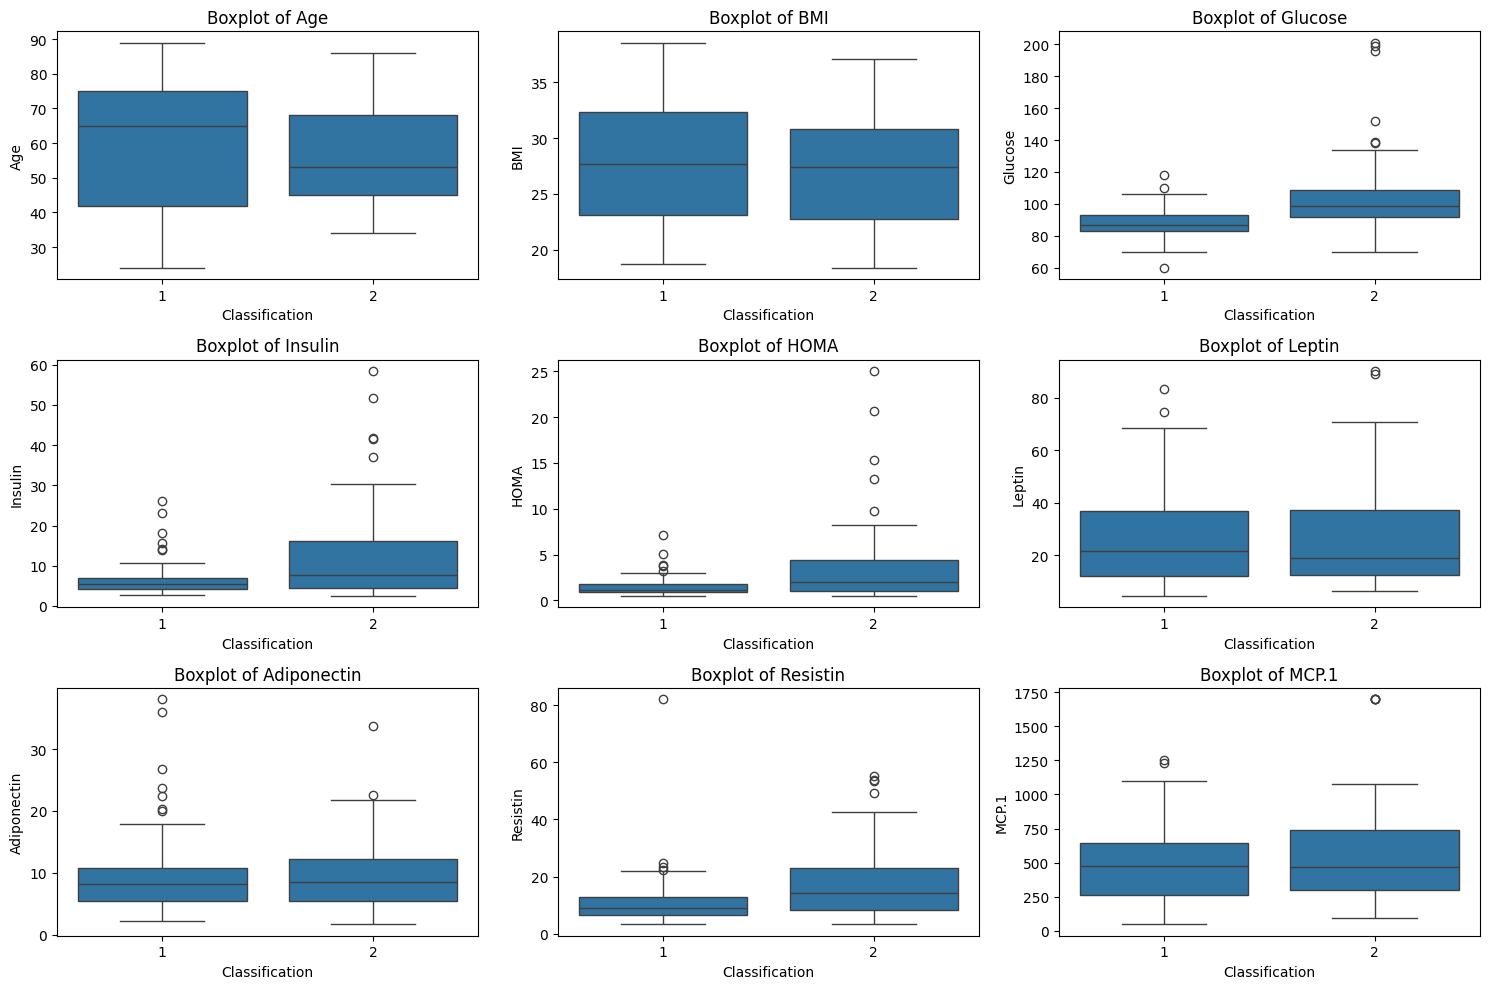

In [12]:
# Boxplots
plt.figure(figsize=(15, 10))
for i, col_name in enumerate(bc.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Classification', y=col_name, data=bc)
    plt.title(f'Boxplot of {col_name}')
plt.tight_layout()
plt.show()

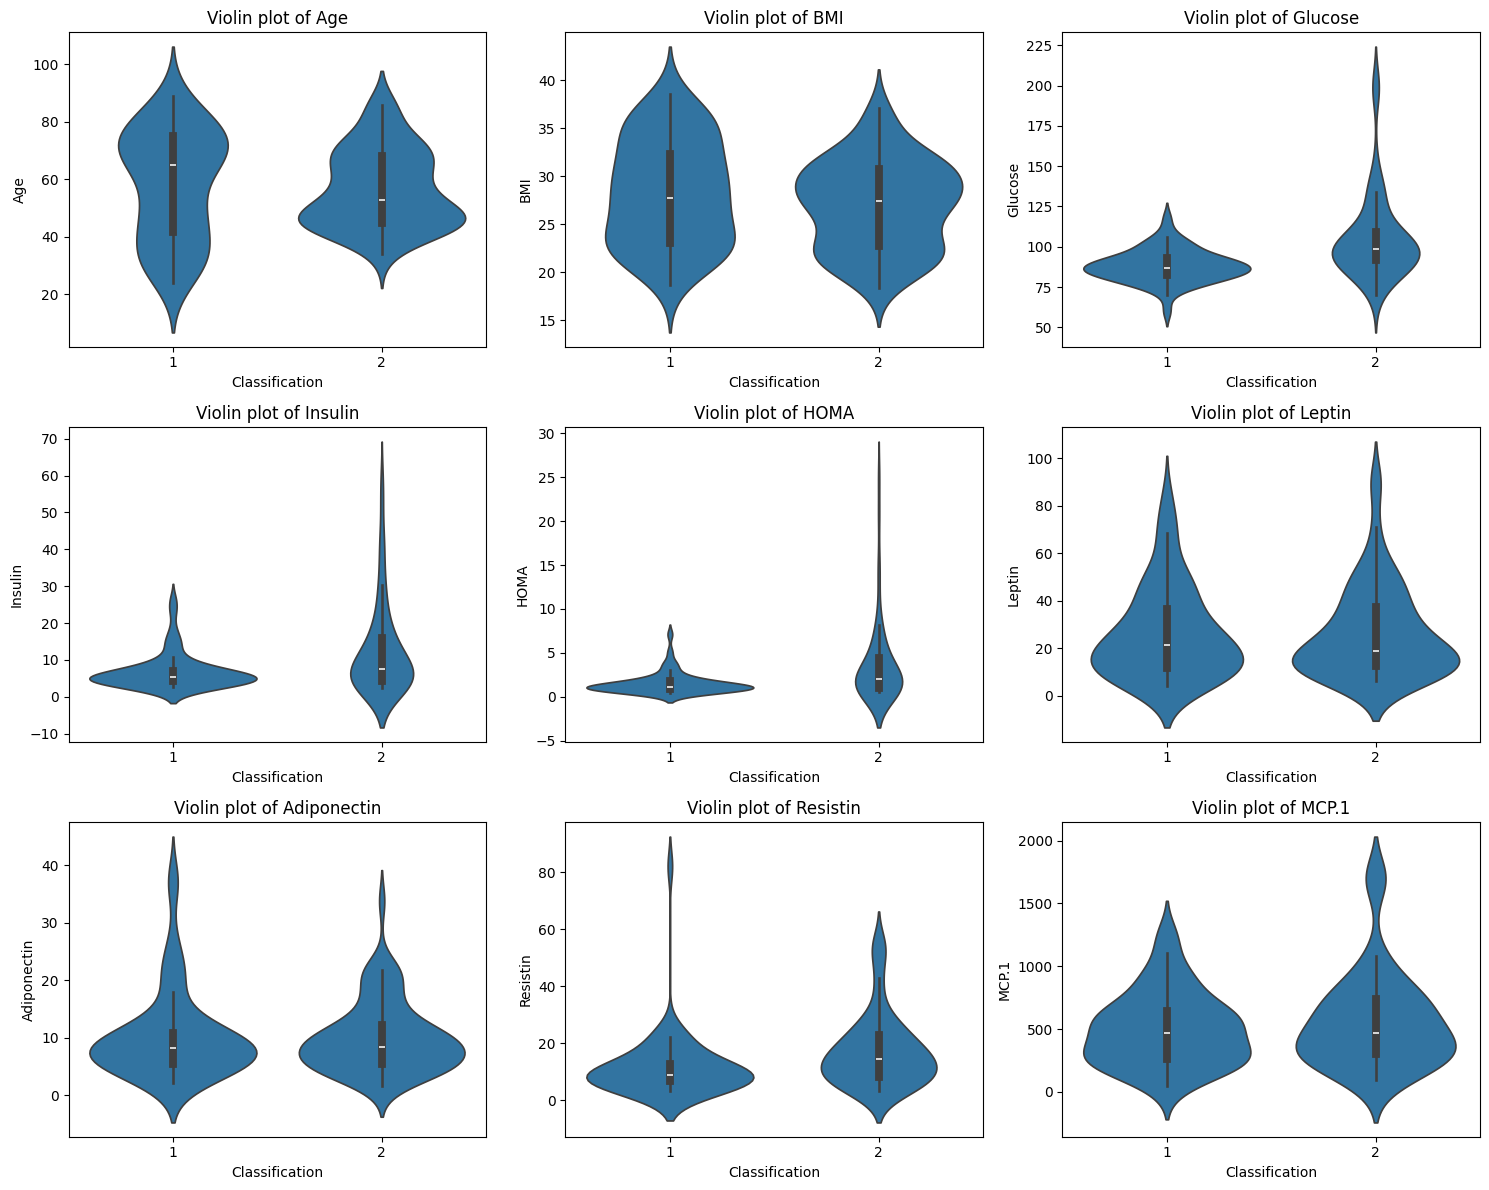

In [13]:
plt.figure(figsize=(15, 12))
for i, column in enumerate(bc.columns[:-1]):  # Exclude the last column which is the 'Classification'
    plt.subplot(3, 3, i+1)
    sns.violinplot(x='Classification', y=column, data=bc)
    plt.title(f'Violin plot of {column}')
plt.tight_layout()
plt.show()

#  Data Test  Train and Test


In [14]:
# Create numpy arrays for features and target class
bc_X = bc.drop('Classification', axis=1).values
bc_y = bc['Classification'].values


In [15]:
# Binarize the target variable (e.g., threshold at median)
median_y = np.median(bc_y)
bc_y_binarized = (bc_y > median_y).astype(int)

In [16]:

# Split the data into training/testing sets
bc_X_train, bc_X_test, bc_y_train, bc_y_test, bc_y_train_binarized, bc_y_test_binarized = train_test_split(
    bc_X, bc_y, bc_y_binarized, test_size=0.2, random_state=42)

In [17]:
# Create a StandardScaler object
scaler = StandardScaler()

# Scale the features (both training and testing sets)
bc_X_train_scaled = scaler.fit_transform(bc_X_train)
bc_X_test_scaled = scaler.transform(bc_X_test)


# Machine Learning - Linear Regression

In [18]:

# Create Linear Regression object
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(bc_X_train_scaled, bc_y_train)

# Make predictions on the test data
y_pred_regression = linear_reg.predict(bc_X_test_scaled)

# Binarize the predictions (e.g., threshold at median of training target)
median_y_train = np.median(bc_y_train)
y_pred_binarized = (y_pred_regression > median_y_train).astype(int)

# Evaluate model using mean squared error, R-squared score, and mean absolute error
mse_regression = mean_squared_error(bc_y_test, y_pred_regression)
r2_regression = r2_score(bc_y_test, y_pred_regression)
mae_regression = mean_absolute_error(bc_y_test, y_pred_regression)

# Calculate accuracy
accuracy = accuracy_score(bc_y_test_binarized, y_pred_binarized)

# Generate classification report
class_report = classification_report(bc_y_test_binarized, y_pred_binarized)

print("Mean Squared Error (Regression):", mse_regression)
print("R-Squared Score (Regression):", r2_regression)
print("Mean Absolute Error (Regression):", mae_regression)
print("Accuracy (Binarized):", accuracy * 100, "%")
print("Classification Report (Binarized):\n", class_report)


Mean Squared Error (Regression): 0.20917762947837704
R-Squared Score (Regression): 0.16328948208649186
Mean Absolute Error (Regression): 0.36715874589269554
Accuracy (Binarized): 87.5 %
Classification Report (Binarized):
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        24
           1       0.00      0.00      0.00         0

    accuracy                           0.88        24
   macro avg       0.50      0.44      0.47        24
weighted avg       1.00      0.88      0.93        24



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Machine Learning - Artifical Neural Network


In [19]:


# Build the ANN model
model = Sequential([
    Dense(64, input_dim=bc_X_train_scaled.shape[1], activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# Train the model
history = model.fit(bc_X_train_scaled, bc_y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=0)

# Make predictions on the test data
y_pred_ann = model.predict(bc_X_test_scaled).flatten()

# Evaluate model using mean squared error, R-squared score, and mean absolute error
mse_ann = mean_squared_error(bc_y_test, y_pred_ann)
r2_ann = r2_score(bc_y_test, y_pred_ann)
mae_ann = mean_absolute_error(bc_y_test, y_pred_ann)

# Binarize the predictions (e.g., threshold at median of training target)
median_y_train = np.median(bc_y_train)
y_pred_binarized = (y_pred_ann > median_y_train).astype(int)

# Calculate accuracy
accuracy = accuracy_score(bc_y_test_binarized, y_pred_binarized)

# Generate classification report
class_report = classification_report(bc_y_test_binarized, y_pred_binarized)

print("Mean Squared Error (ANN):", mse_ann)
print("R-Squared Score (ANN):", r2_ann)
print("Mean Absolute Error (ANN):", mae_ann)
print("Accuracy (Binarized):", accuracy * 100, "%")
print("Classification Report (Binarized):\n", class_report)

1/1 [==============================] - 0s 94ms/step
Mean Squared Error (ANN): 0.22803575226850561
R-Squared Score (ANN): 0.08785699092597754
Mean Absolute Error (ANN): 0.39515019704898197
Accuracy (Binarized): 79.16666666666666 %
Classification Report (Binarized):
               precision    recall  f1-score   support

           0       1.00      0.79      0.88        24
           1       0.00      0.00      0.00         0

    accuracy                           0.79        24
   macro avg       0.50      0.40      0.44        24
weighted avg       1.00      0.79      0.88        24



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Machine Learning - KNN


In [20]:
# Create KNN Regressor object
knn_reg = KNeighborsRegressor(n_neighbors=5)

# Fit the model to the training data
knn_reg.fit(bc_X_train_scaled, bc_y_train)

# Make predictions on the test data
y_pred_knn = knn_reg.predict(bc_X_test_scaled)

# Binarize the predictions (e.g., threshold at median of training target)
median_y_train = np.median(bc_y_train)
y_pred_binarized = (y_pred_knn > median_y_train).astype(int)

# Evaluate model using mean squared error, R-squared score, and mean absolute error
mse_knn = mean_squared_error(bc_y_test, y_pred_knn)
r2_knn = r2_score(bc_y_test, y_pred_knn)
mae_knn = mean_absolute_error(bc_y_test, y_pred_knn)

# Calculate accuracy
accuracy = accuracy_score(bc_y_test_binarized, y_pred_binarized)

# Generate classification report
class_report = classification_report(bc_y_test_binarized, y_pred_binarized)

print("Mean Squared Error (k-NN):", mse_knn)
print("R-Squared Score (k-NN):", r2_knn)
print("Mean Absolute Error (k-NN):", mae_knn)
print("Accuracy (Binarized):", accuracy * 100, "%")
print("Classification Report (Binarized):\n", class_report)

Mean Squared Error (k-NN): 0.12833333333333333
R-Squared Score (k-NN): 0.4866666666666667
Mean Absolute Error (k-NN): 0.3083333333333333
Accuracy (Binarized): 100.0 %
Classification Report (Binarized):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        24

    accuracy                           1.00        24
   macro avg       1.00      1.00      1.00        24
weighted avg       1.00      1.00      1.00        24



# Machine Learning - Logistic Regression

In [23]:

log = LogisticRegression(random_state = 0)
log.fit(bc_X_train, bc_y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [25]:
accuracy_lr = log.score(bc_X_train, bc_y_train)
print('Accuracy Model Logistic Regression  :  {}%'.format(accuracy_lr*100))
print("\n Classification Report Model Logistic Regression \n")
print(classification_report(bc_y_test,log.predict(bc_X_test)) )

Accuracy Model Logistic Regression  :  76.08695652173914%

 Classification Report Model Logistic Regression 

              precision    recall  f1-score   support

           1       0.80      0.67      0.73        12
           2       0.71      0.83      0.77        12

    accuracy                           0.75        24
   macro avg       0.76      0.75      0.75        24
weighted avg       0.76      0.75      0.75        24



# Machine Learning - Support Vector Machine Classifier (Linear Algorithm)

In [26]:

svc_linear = SVC(kernel = 'linear', random_state = 0)
svc_linear.fit(bc_X_train, bc_y_train)

SVC(kernel='linear', random_state=0)

In [28]:
akurasi_svc = svc_linear.score(bc_X_train, bc_y_train)
print('Akurasi Model Support Vector Machine Classifier - Algoritma Linear adalah : {}%'.format(akurasi_svc*100))
print("\n Classification Report Model Support Vector Machine Classifier - Algoritma Linear  \n")
print(classification_report(bc_y_test,svc_linear.predict(bc_X_test)) )

Akurasi Model Support Vector Machine Classifier - Algoritma Linear adalah : 72.82608695652173%

 Classification Report Model Support Vector Machine Classifier - Algoritma Linear  

              precision    recall  f1-score   support

           1       0.75      1.00      0.86        12
           2       1.00      0.67      0.80        12

    accuracy                           0.83        24
   macro avg       0.88      0.83      0.83        24
weighted avg       0.88      0.83      0.83        24



# Machine Learning - K Mean Clustering

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, adjusted_rand_score, normalized_mutual_info_score

from sklearn.decomposition import PCA


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


   Age        BMI  Glucose  Insulin      HOMA   Leptin  Adiponectin  Resistin  \
0   48  23.500000       70    2.707  0.467409   8.8071     9.702400   7.99585   
1   83  20.690495       92    3.115  0.706897   8.8438     5.429285   4.06405   
2   82  23.124670       91    4.498  1.009651  17.9393    22.432040   9.27715   
3   68  21.367521       77    3.226  0.612725   9.8827     7.169560  12.76600   
4   86  21.111111       92    3.549  0.805386   6.6994     4.819240  10.57635   

     MCP.1  Classification  Cluster  
0  417.114               1        1  
1  468.786               1        1  
2  554.697               1        1  
3  928.220               1        1  
4  773.920               1        1  


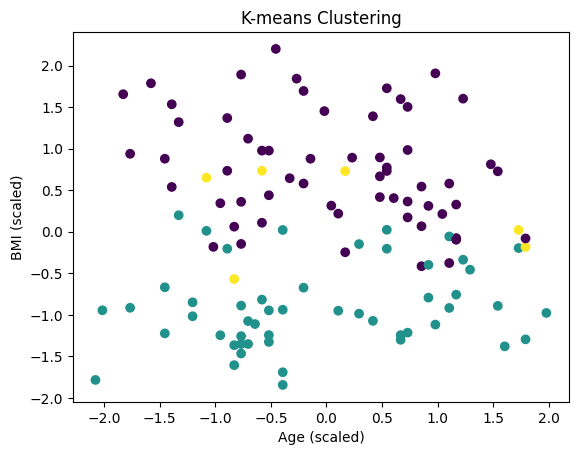

In [36]:
# Remove the target variable 'Classification'
bc_X = bc.drop('Classification', axis=1)

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the features
bc_X_scaled = scaler.fit_transform(bc_X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(bc_X_scaled)

# Add the cluster labels to the DataFrame
bc['Cluster'] = kmeans.labels_

# Print the first few rows of the DataFrame with cluster labels
print(bc.head())

# Visualize the clusters using the first two features
plt.scatter(bc_X_scaled[:, 0], bc_X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Age (scaled)')
plt.ylabel('BMI (scaled)')
plt.title('K-means Clustering')
plt.show()


In [37]:
# Map clusters to the most frequent true labels
def map_clusters_to_labels(clusters, true_labels):
    label_mapping = {}
    for cluster in np.unique(clusters):
        mask = (clusters == cluster)
        most_common_label = np.bincount(true_labels[mask]).argmax()
        label_mapping[cluster] = most_common_label
    return label_mapping

cluster_to_label = map_clusters_to_labels(kmeans.labels_, bc_y)
mapped_clusters = np.vectorize(cluster_to_label.get)(kmeans.labels_)

# Calculate accuracy
accuracy = accuracy_score(bc_y, mapped_clusters)

# Calculate ARI and NMI
ari = adjusted_rand_score(bc_y, kmeans.labels_)
nmi = normalized_mutual_info_score(bc_y, kmeans.labels_)

print("Accuracy:", accuracy * 100, "%")
print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)

Accuracy: 55.172413793103445 %
Adjusted Rand Index (ARI): -0.011181742599686836
Normalized Mutual Information (NMI): 0.041278437305139255


# Machine Learning - PCA Algorithm

Explained Variance Ratio: [0.30585424 0.21747669]


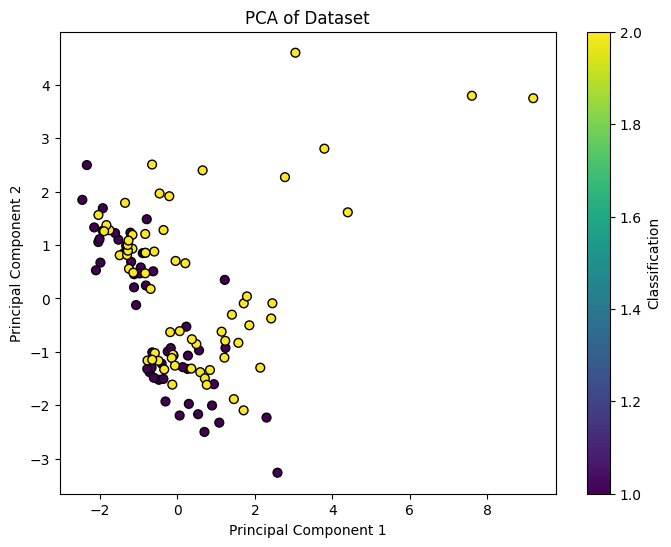

In [38]:

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
bc_X_pca = pca.fit_transform(bc_X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=bc_X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Classification'] = bc_y.values

# Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

# Visualize the PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Classification'], cmap='viridis', edgecolor='k', s=40)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.colorbar(label='Classification')
plt.show()


In [39]:
# Separate features and target variable
bc_X = bc.drop('Classification', axis=1)
bc_y = bc['Classification']

# Standardize the features
scaler = StandardScaler()
bc_X_scaled = scaler.fit_transform(bc_X)

# Apply PCA
pca = PCA(n_components=2)  # Adjust the number of components as needed
bc_X_pca = pca.fit_transform(bc_X_scaled)

# Split the PCA-transformed data into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(bc_X_pca, bc_y, test_size=0.2, random_state=42)

# Train a classifier on the PCA-transformed data
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy * 100, "%")
print("Classification Report:\n", class_report)

Accuracy: 79.16666666666666 %
Classification Report:
               precision    recall  f1-score   support

           1       0.82      0.75      0.78        12
           2       0.77      0.83      0.80        12

    accuracy                           0.79        24
   macro avg       0.79      0.79      0.79        24
weighted avg       0.79      0.79      0.79        24

